In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

Petrol Fiyat Tahmini
Finansal verilerin tahmini bilimsel çalışmalarda da uygulamada da uzun zamandır dikkat çekilen bir konudur. Son yıllarda yaşanan ve dünyayı etkileyen çeşitli olaylarda hareketliliği oldukça artan petrol fiyatları üzerinde çalışmak ve yaşanan bu fiyat değişimlerini anlamak gelecekte yaşanacak olası durumları değerlendirmede etkili bir rol üstlenecektir. Fiyat hareketleri öngörme ve geleceğe dönük değerlerini tahmin etme hedefi için yapay zekâ algoritmalarının başarılı yöntemler sundukları farklı akademik çalışmalarca ortaya konulmuştur

In [87]:
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
import math, time
from math import sqrt
from sklearn.metrics import mean_squared_error

In [88]:
df = pd.read_csv('Petrol.csv',dtype={"Price": float})
df_copy = df.copy()
df_copy1 = df.copy()
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

Petrol isimli veri seti okunur. Daha sonra bu veri seti üzerinde yapılacak işlmelerden etkilenmeden önceki halini saklamak için iki adet kopya oluşturulur. Veri setinde ki tarih veri tipi pandas tarih veri tipine dönüştürülür.

In [89]:
df.tail()

,Price
Date,
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68
2021-01-22,55.22
2021-01-25,55.44


In [90]:
df.shape

(8554, 1)

In [91]:
df.isnull().sum()

Price    0
dtype: int64

Veri setinin son 5 verisi gösterilir. Veri setininin biçim 8554 e 1 liktir ve hiçbir boş veri yoktur.

In [92]:
df.dtypes

Price    float64
dtype: object

In [93]:
df.describe()

,Price
count,8554.000000
mean,46.352962
std,32.165282
min,9.100000
25%,18.850000
50%,33.240000
75%,66.210000
max,143.950000


<ipython-input-375-3ff4cff2f739>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


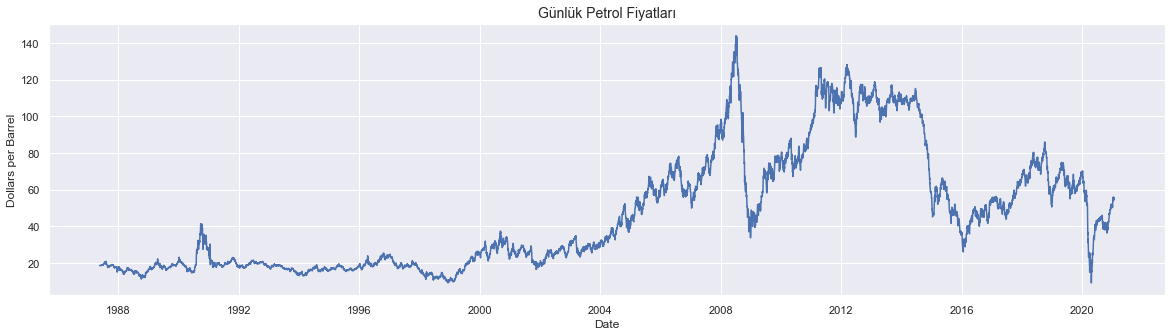

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns # using seaborn because the charts are more visually pleasing

sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
sns.lineplot(x="Date", y="Price", data=df)
plt.title('Günlük Petrol Fiyatları', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.show()

Geçmişten bu güne kadar verilen günlük fiyatlar tarihsel olarak grafikleştirlir.

In [252]:
dataset1=df_copy.copy()

In [253]:
dataset1['year'] = pd.DatetimeIndex(dataset1['Date']).year
dataset1['month'] = pd.DatetimeIndex(dataset1['Date']).month
dataset1['day'] = pd.DatetimeIndex(dataset1['Date']).day

veri serinin tarih biçimleri Pyplt kütühnaesinde işlenebilcek hala getirlir.

In [254]:
dataset1.drop('Date', axis=1, inplace=True)

Tarih verisi değiştirldiği için eski veri silinir

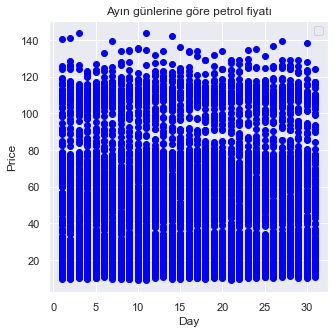

In [294]:
fig=plt.figure(figsize=(5,5))
plt.scatter(dataset1['day'],dataset1['Price'],color='blue')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Ayın günlerine göre petrol fiyatı')
plt.legend()

Gün ile fiyatarasından pek bir bağlam oluşmadığını grafik sayesinde anlamış oluyoruz.

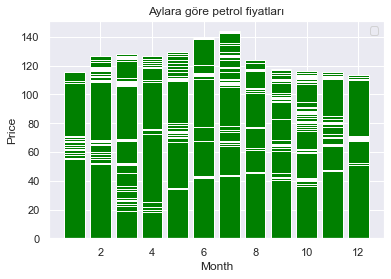

In [295]:
plt.bar(dataset1['month'],dataset1['Price'],color='green')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Aylara göre petrol fiyatları')
plt.legend()

<AxesSubplot:>

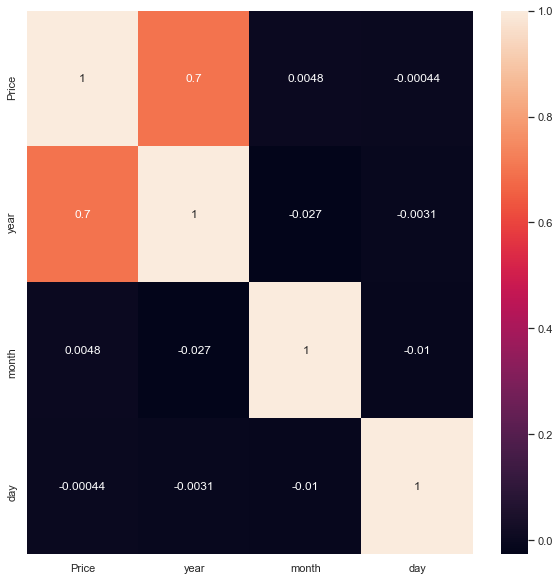

In [299]:
plt.figure(figsize=(10,10))
corr=dataset1.corr()
sns.heatmap(corr,annot=True)

In [ ]:
import fbprophet
from fbprophet import Prophet
m = Prophet()

In [ ]:
pro_df = df_copy
pro_df.columns = ['ds','y']
pro_df.head()

Veri setinin Prophet kütühanesiyle işlenmesi için ön işlmeler yapılır.

In [97]:
m.fit(pro_df)
future = m.make_future_dataframe(periods = 90)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Veri seti Prophet kütühanesi ile 90 günlük ileriye doğru tahmin yapılır.

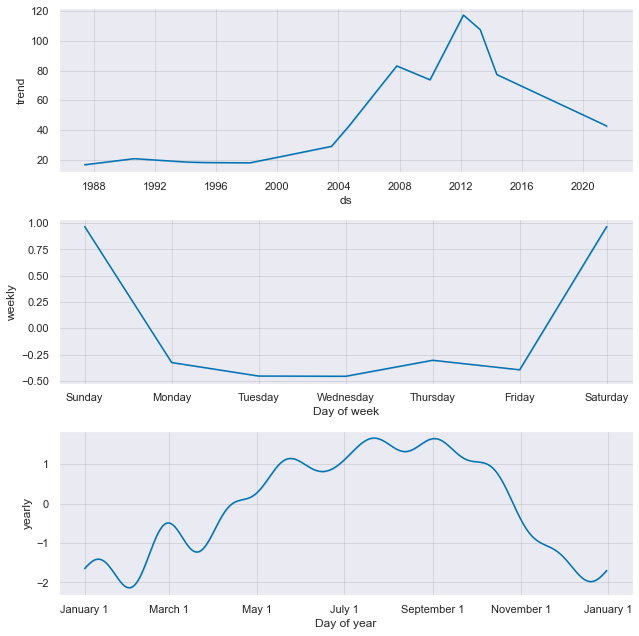

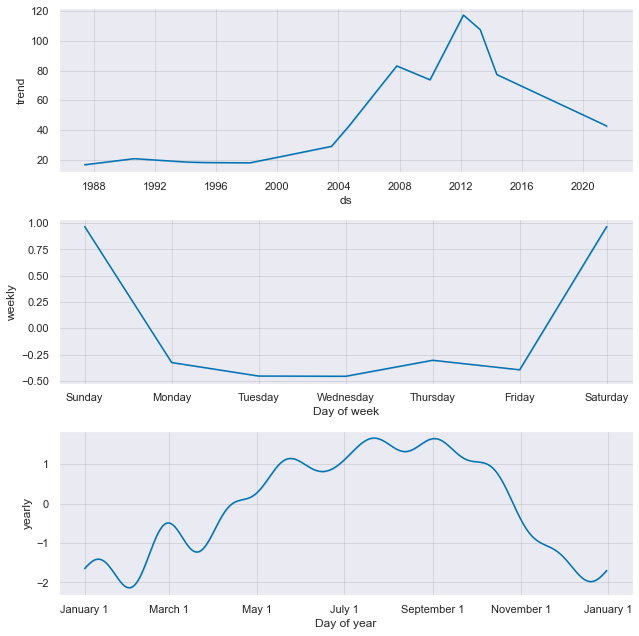

In [98]:
m.plot_components(forecast)

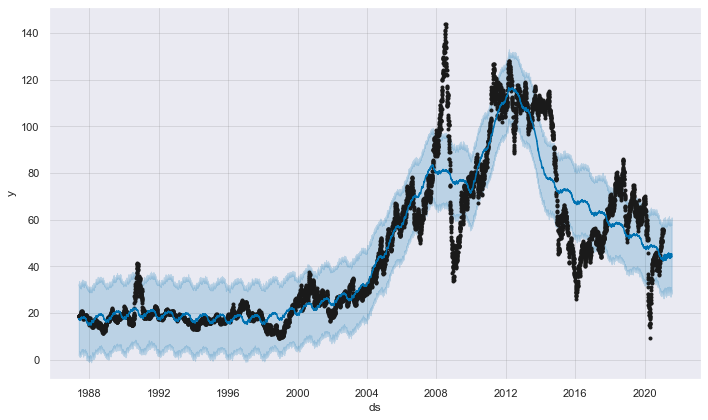

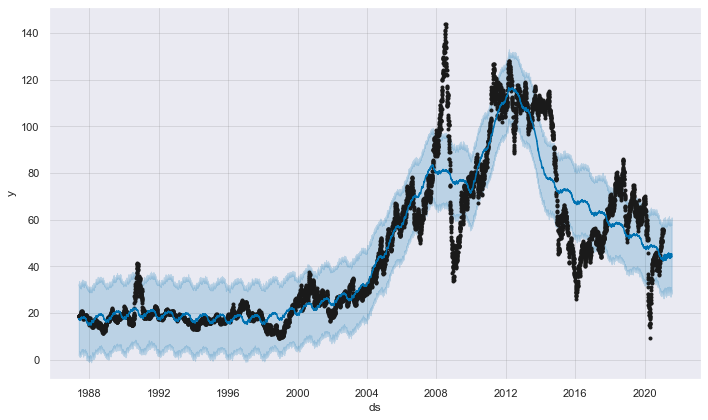

In [99]:
m.plot(forecast)

Tahmin edilen fiyalraın gerçek fiyalar ile karşılaştırlıması

In [100]:
Real_Prices=pro_df["y"]
se = np.square(forecast.loc[:, 'yhat'] - Real_Prices)
mse = np.mean(se)
rmse = np.sqrt(mse)

In [101]:
print(rmse)

11.665628663459177


Tahminin hata değeri

In [111]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='90 days')
df_cv.head()

 46%|████▌     | 29/63 [13:41<16:03, 28.32s/it]
INFO:fbprophet:Making 264 forecasts with cutoffs between 1988-06-02 00:00:00 and 2020-10-27 00:00:00
100%|██████████| 264/264 [1:27:54<00:00, 19.98s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1988-06-03,16.468218,16.044317,16.922745,16.45,1988-06-02
1,1988-06-06,16.473774,16.067344,16.910170,16.25,1988-06-02
2,1988-06-07,16.430361,15.988173,16.864590,16.23,1988-06-02
3,1988-06-08,16.454394,16.028423,16.846534,16.28,1988-06-02
4,1988-06-09,16.442268,16.041729,16.860675,16.30,1988-06-02


On the 1st iteration, it will train on days 1-365 and will forecast on days 366 to 385. 
On the 2nd iteration, it will train on days 11-375 and will forecast on days 376 to 395, etc.

In [138]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
minvalue=df_p.idxmin()
minvalue

horizon      0
mse         11
rmse        11
mae         11
mape        11
mdape       15
coverage    22
dtype: int64

Her hata ölçütünün min verdiği index bulunur.

In [296]:
df_p['rmse'].head(20)

0     6.177173
1     6.502300
2     6.395532
3     5.362354
4     4.707013
5     5.558698
6     6.475081
7     6.483166
8     6.080025
9     6.091447
10    4.769245
11    3.992949
12    4.691922
13    5.969749
14    7.786487
15    7.340252
16    6.413685
17    4.918476
18    4.248031
19    6.086275
Name: rmse, dtype: float64

11. indexte görüldüğü gibi hata 3.99 ile en azdır.

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df.Price.values.reshape(-1, 1))
dataset[0:10]

array([[0.07067112],
       [0.0693363 ],
       [0.07007786],
       [0.07044865],
       [0.07067112],
       [0.07044865],
       [0.07044865],
       [0.07030033],
       [0.07081943],
       [0.0710419 ]])

Makine öğreniminde bir scaler, bir aralık kullanan ve ona ilettiğiniz tüm değerleri veri aralığında ayarlayan bir araçtır.

In [146]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
f'Dataset size: {len(df)} >> Train length: {len(train)} || Test Length: {len(test)}'

'Dataset size: 8554 >> Train length: 5987 || Test Length: 2567'

Modelimizin etkinliğini test etmek için elimizdeki verilerde test etmemiz gerekiyor. Bunu yapmak için verilerimizin %70'inin eğitim için ve %30'unun test için kullanıldığı bir train_test_split yaklaşımı kullandım.

Aşağıdaki fonksiyon, eğitim ve test verilerinin veri dönüşümünü sağlar, böylece LTMS ağına (LSTM matrisleri tercih ettiğinden) modelimize yükleyebiliriz.

In [147]:
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [204]:
x_train, y_train = create_dataset(train, look_back=15)
x=x_train.copy()
y=y_train.copy()
x_test, y_test = create_dataset(test, look_back=15)
f'X_train: {x_train.shape} || \
y_train: {y_train.shape} || \
X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'X_train: (5971, 15) || y_train: (5971,) || X_test: (2551, 15) || y_test: (2551,)'

In [149]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
f'x_train: {x_train.shape} || \y_train: {y_train.shape} || \X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'X_train: (5971, 1, 15) || y_train: (5971,) || X_test: (2551, 1, 15) || y_test: (2551,)'

In [150]:
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=18, batch_size=1, verbose=2)

Epoch 1/18
5971/5971 - 13s - loss: 9.0820e-04 - 13s/epoch - 2ms/step
Epoch 2/18
5971/5971 - 11s - loss: 2.0746e-04 - 11s/epoch - 2ms/step
Epoch 3/18
5971/5971 - 11s - loss: 1.6959e-04 - 11s/epoch - 2ms/step
Epoch 4/18
5971/5971 - 10s - loss: 1.4767e-04 - 10s/epoch - 2ms/step
Epoch 5/18
5971/5971 - 11s - loss: 1.3784e-04 - 11s/epoch - 2ms/step
Epoch 6/18
5971/5971 - 11s - loss: 1.2824e-04 - 11s/epoch - 2ms/step
Epoch 7/18
5971/5971 - 11s - loss: 1.2162e-04 - 11s/epoch - 2ms/step
Epoch 8/18
5971/5971 - 10s - loss: 1.1102e-04 - 10s/epoch - 2ms/step
Epoch 9/18
5971/5971 - 10s - loss: 1.1698e-04 - 10s/epoch - 2ms/step
Epoch 10/18
5971/5971 - 11s - loss: 1.1531e-04 - 11s/epoch - 2ms/step
Epoch 11/18
5971/5971 - 10s - loss: 1.0687e-04 - 10s/epoch - 2ms/step
Epoch 12/18
5971/5971 - 11s - loss: 1.0965e-04 - 11s/epoch - 2ms/step
Epoch 13/18
5971/5971 - 10s - loss: 9.8822e-05 - 10s/epoch - 2ms/step
Epoch 14/18
5971/5971 - 10s - loss: 9.8001e-05 - 10s/epoch - 2ms/step
Epoch 15/18
5971/5971 - 10s -

Ağ 20 epoch eğitildi

In [154]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

Eğitilen ağa test ve train verileri gönderildi

In [155]:
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])

Verileri Scale ettiğimiz için gerçek verilere göre çok farklı durumdalar. Scale işlemini taminlerde geri aldığmızda gerçek verilerle karşılaştımak daha iyi olcaktır.

In [157]:
RMSE_Score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE Skor: %.2f RMSE' % (RMSE_Score))

RMSE Skor: 1.17 RMSE


Ağı tasarlarken MSE fonksiyonunu loss fonksiyon olarak seçtik.
Bu fonksiyonun kökü ile  RMSE değeri elde edilir.
Prophet ile elde ettiğimiz 3.99 değerinden çok daha iyi bir sonuç elde ettik.

In [194]:
import keras_tuner as kt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [217]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [218]:
print(x.shape,x_train.shape,x_test.shape)

(5971, 15) (4776, 15) (1195, 15)


In [219]:
scaler=StandardScaler()

In [220]:
scaler.fit(x_train)

StandardScaler()

In [221]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


En iyi parametreleri bulak için keras tuner işlemini kullnacağız.
bunun için veriyi hazırladık 

In [237]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

Keras da verilecek hiper parametreler için seçenekler belirlendi. Tuner bu seçenekler arasında en iyisini seçecek.

In [238]:
tuner = kt.RandomSearch(
    build_model,
    max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [245]:
tuner.search(x_train, y_train,
        objective='root_mean_squared_error',
         epochs=20,
         validation_data=(x_test, y_test))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
32                |?                 |units



TypeError: fit() got an unexpected keyword argument 'objective'

Model üzerinde en iyi paratmetre arama işlemi hata verdi 
Veri setinin biçimini değiştimek veya başka best paramtre bulma yöntemleri işe yaramadı.

In [341]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [342]:
x_train, y_train = create_dataset(train, look_back=15)
x=x_train.copy()
y=y_train.copy()
x_test, y_test = create_dataset(test, look_back=15)
f'X_train: {x_train.shape} || \
y_train: {y_train.shape} || \
X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'X_train: (5971, 15) || y_train: (5971,) || X_test: (2551, 15) || y_test: (2551,)'

In [343]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
f'x_train: {x_train.shape} || \
y_train: {y_train.shape} || \
X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'x_train: (5971, 1, 15) || y_train: (5971,) || X_test: (2551, 1, 15) || y_test: (2551,)'

In [344]:
model = keras.Sequential()
model.add(layers.GRU(50, input_shape=(1, 15)))
model.add(layers.BatchNormalization())
model.add(Dense(1))


In [345]:
model.compile(loss='mean_squared_error', optimizer='adam')

Önceki modelde yapılan veri ön işleme işlmeleri tekra yapıldı

In [346]:
model.fit( x_train,y_train, batch_size=64, epochs=20)

Epoch 1/20
94/94 [==============================] - 3s 4ms/step - loss: 0.0215
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 9.8613e-04
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 7.5326e-04
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 8.0338e-04
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 8.9093e-04
Epoch 8/20
94/94 [==============================] - 0s 3ms/step - loss: 8.8157e-04
Epoch 9/20
94/94 [==============================] - 0s 4ms/step - loss: 8.5535e-04
Epoch 10/20
94/94 [==============================] - 0s 4ms/step - loss: 7.3901e-04
Epoch 11/20
94/94 [==============================] - 0s 4ms/step - loss: 9.2107e-04
Epoch 12/20
94/94 [==============================] - 0s 3ms/step - loss: 8.1196e-04
Epoch 13/20
9

In [347]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

In [348]:
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])

In [349]:
RMSE_Score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('RMSE Skor: %.2f RMSE' % (RMSE_Score))

RMSE Skor: 3.49 RMSE


In [351]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(1, 15))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 1, 128)           40960     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 82,241
Trainable params: 82,241
Non-trainable params: 0
_________________________________________________________________


In [352]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit( x_train,y_train, batch_size=64, epochs=25)

Epoch 1/25
94/94 [==============================] - 9s 6ms/step - loss: 0.0063
Epoch 2/25
94/94 [==============================] - 1s 6ms/step - loss: 3.1839e-04
Epoch 3/25
94/94 [==============================] - 1s 6ms/step - loss: 2.8402e-04
Epoch 4/25
94/94 [==============================] - 1s 6ms/step - loss: 2.5291e-04
Epoch 5/25
94/94 [==============================] - 1s 6ms/step - loss: 2.1030e-04
Epoch 6/25
94/94 [==============================] - 1s 6ms/step - loss: 1.6529e-04
Epoch 7/25
94/94 [==============================] - 1s 6ms/step - loss: 1.3299e-04
Epoch 8/25
94/94 [==============================] - 1s 6ms/step - loss: 1.2849e-04
Epoch 9/25
94/94 [==============================] - 1s 6ms/step - loss: 1.2439e-04
Epoch 10/25
94/94 [==============================] - 1s 6ms/step - loss: 1.1766e-04
Epoch 11/25
94/94 [==============================] - 1s 8ms/step - loss: 1.0448e-04
Epoch 12/25
94/94 [==============================] - 1s 6ms/step - loss: 1.0710e-04
Epoch

In [353]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

In [354]:
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])

In [355]:
RMSE_Score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('RMSE Skor: %.2f RMSE' % (RMSE_Score))

RMSE Skor: 1.33 RMSE


Prophet, LSTM, GRU, Bidirectional LSTM kullanıldaktan sonra en iyi sonuç
1.17 RMSE ile LSTM ağında bulundu.